# 1 model
---
经验数据 `-->` 规律发现 `-->` 验证数据 `-->` 实践规律 `-->` 完善提高

`|<--         model           -->|`
- build
- train
- validation
- test
- application

# 2 Application
---
1. regression predict
2. classify
    - non-supervision(cluster)
    - supervision
3. recommend engine
4. natural language
5. video,image recognition
6. face or fingerprient recognition
7. neural network


# 3 pre-process of data(for column value)
---
## 3.1 remove average `import sklearn.preprocessing as sp`
- $\sqrt{\frac{(x_1-\bar{x})^2+\dots+(x_n-\bar{x})^2}{n}}$
- `col = col - mean`
- `col /= col_std `


## 3.2 range scaling (mmx.py)
- %%%%
- `A x = b`
- `np.linalg.lstsq(A, b)`

In [15]:
## mmx.py
import numpy as np

def mmx_scale(raw_samples, bmin, bmax):
    nor_samples = raw_samples.copy()
    cols =nor_samples.shape[1]
    for col in range(cols):
        col_samples = nor_samples[:, col]
        col_min = col_samples.min()
        col_max = col_samples.max()
        # 线性缩放。把最大值和最小值缩到指定范围的最大最小值，那么中间值则也在范围之内。
        # col_min * k + b = bmin
        # col_max * k + b = bmax
        k, b = np.linalg.lstsq(
            np.array([[col_min,1],[col_max,1]]),
            np.array([bmin, bmax])
        )[0]
        col_samples *= k
        col_samples += b
    return nor_samples

def main():
    raw_samples = np.array([
        [3, -1.5, 2, -5.4],
        [0, 4, -0.3, 2.1],
        [1, 3.3, -1.9, -4.3]
    ])
    print(raw_samples)
    mmx_samples = mmx_scale(raw_samples, 0, 1)
    print(mmx_samples)
    
    # use sp
    # create scaler
    mmx = sp.MinMaxScaler(feature_range=(0, 1))
    mmx_samples = mmx.fit_transform(raw_samples)
    print(mmx_samples)

if __name__ == '__main__':
    main()

[[ 3.  -1.5  2.  -5.4]
 [ 0.   4.  -0.3  2.1]
 [ 1.   3.3 -1.9 -4.3]]
[[  1.00000000e+00  -2.77555756e-16   1.00000000e+00  -2.22044605e-16]
 [  1.85037171e-17   1.00000000e+00   4.10256410e-01   1.00000000e+00]
 [  3.33333333e-01   8.72727273e-01  -2.22044605e-16   1.46666667e-01]]
[[ 1.          0.          1.          0.        ]
 [ 0.          1.          0.41025641  1.        ]
 [ 0.33333333  0.87272727  0.          0.14666667]]


## 3.3 normalization (for row value of sample)(norm.py)
- scaling the feature values of every sample to the range of `[0, 1]`,and the sum of absolute value is 1.


In [12]:
## norm.py
import numpy as np
import sklearn.preprocessing as sp

def normalize(raw_samples):
    nor_samples = raw_samples.copy()
    rows =nor_samples.shape[0]
    for row in range(rows):
        row_samples = nor_samples[row]
        row_abs = abs(row_samples)
        row_abs_sum = row_abs.sum()
        row_samples /= row_abs_sum
    return nor_samples

def main():
    raw_samples = np.array([
        [3, -1.5, 2, -5.4],
        [0, 4, -0.3, 2.1],
        [1, 3.3, -1.9, -4.3]
    ])
    print(raw_samples)
    nor = normalize(raw_samples)
    print(nor)
    for row in range(nor.shape[0]):
        row_sample = nor[row]
        abs_sample = abs(row_sample)
        sum_sample = abs_sample.sum()
        print(sum_sample)
        
    # sp
    nor2 = sp.normalize(raw_samples, norm='l1')
    print(nor2)
    for row in range(nor2.shape[0]):
        row_sample = nor2[row]
        abs_sample = abs(row_sample)
        sum_sample = abs_sample.sum()
        print(sum_sample)

if __name__ == '__main__':
    main()

[[ 3.  -1.5  2.  -5.4]
 [ 0.   4.  -0.3  2.1]
 [ 1.   3.3 -1.9 -4.3]]
[[ 0.25210084 -0.12605042  0.16806723 -0.45378151]
 [ 0.          0.625      -0.046875    0.328125  ]
 [ 0.0952381   0.31428571 -0.18095238 -0.40952381]]
1.0
1.0
1.0
[[ 0.25210084 -0.12605042  0.16806723 -0.45378151]
 [ 0.          0.625      -0.046875    0.328125  ]
 [ 0.0952381   0.31428571 -0.18095238 -0.40952381]]
1.0
1.0
1.0


## 3.4 二值化(bin.py)
- 根据一个预先设定的阈值，小于等于阈值的为0，大于的为1.

In [14]:
## bin.py
import numpy as np
import sklearn.preprocessing as sp

def binarize(raw_samples, threshold):
    bin_samples = raw_samples.copy()
    bin_samples[bin_samples <= threshold] = 0
    bin_samples[bin_samples > threshold] = 1
    return bin_samples

def main():
    raw_samples = np.array([
        [3, -1.5, 2, -5.4],
        [0, 4, -0.3, 2.1],
        [1, 3.3, -1.9, -4.3]
    ])
    print(raw_samples)
    bina = binarize(raw_samples, 1.4)
    print(bina)
    
    # use sp
    bin = sp.Binarizer(threshold=1.4)
    bina2 = bin.transform(raw_samples)
    print(bina2)

if __name__ == '__main__':
    main()

[[ 3.  -1.5  2.  -5.4]
 [ 0.   4.  -0.3  2.1]
 [ 1.   3.3 -1.9 -4.3]]
[[ 1.  0.  1.  0.]
 [ 0.  1.  0.  1.]
 [ 0.  1.  0.  0.]]
[[ 1.  0.  1.  0.]
 [ 0.  1.  0.  1.]
 [ 0.  1.  0.  0.]]


## 3.5 独热编码
---
```
    0       0        3
    1       1        0
    0       2        1
    1       0        2
    ------------  -----
    0 -10   0-100    0- 1000
    1 -01   1-010    1- 0100
            2-001    2- 0010
                     3- 0001

    --------------------------
    101000001
    010101000
    100010010
    011000010
    
```    
    

In [5]:
# ohe.py
import numpy as np
import sklearn.preprocessing as sp

def onehotencode(raw_samples):
    code_tables = []
    for column in raw_samples.T:
        code_table = {}
        for value in column:
            code_table[value] = None
        code_tables.append(code_table)
        
    for code_table in code_tables:
        size = len(code_table)
        for one, key in enumerate(sorted(code_table.keys())):
            code_table[key] = np.zeros(shape=size, dtype=int)
            code_table[key][one] = 1
    
    ohe_samples = []
    for raw_sample in raw_samples:
        ohe_sample = np.array([], dtype=int)
        for column, feature in enumerate(raw_sample):
            ohe_sample = np.hstack((ohe_sample, code_tables[column][feature]))
        ohe_samples.append(ohe_sample)
    return np.array(ohe_samples)


def main():
    raw_samples = np.array([
        [0, 0, 3],
        [1, 1, 0],
        [0, 2, 1],
        [1, 0, 2]
    ])
    print(raw_samples)
    ohe_sample = onehotencode(raw_samples)
    print(ohe_sample)
    print('--------------')
    # use sp
    ohe = sp.OneHotEncoder(sparse=False, dtype=int)
    new = ohe.fit_transform(raw_samples)
    print(new)
    
if __name__ == '__main__':
    main()

[[0 0 3]
 [1 1 0]
 [0 2 1]
 [1 0 2]]
[[1 0 1 0 0 0 0 0 1]
 [0 1 0 1 0 1 0 0 0]
 [1 0 0 0 1 0 1 0 0]
 [0 1 1 0 0 0 0 1 0]]
--------------
[[1 0 1 0 0 0 0 0 1]
 [0 1 0 1 0 1 0 0 0]
 [1 0 0 0 1 0 1 0 0]
 [0 1 1 0 0 0 0 1 0]]


## 3.6 标记编码(label encode)
---
 样本的特征值如果已经是数字，则直接使用它们，如果是字符串，则可以通过标记编码得到与之对应的唯一数字，以方便后续处理。
 

In [16]:
# labels.py
from sklearn import preprocessing as sp
import numpy as np


def main():
    label_samples = [0,'baoma', 'benchi',3, 'dazhong', 'fute', 'kayan', 'mading', 'falali']
    print(label_samples)
    labeler = sp.LabelEncoder()
    en_label = labeler.fit_transform(label_samples)
    print(en_label)
    de_label = labeler.inverse_transform(en_label)
    print(de_label)
    
    
if __name__ == '__main__':
    main()

[0, 'baoma', 'benchi', 3, 'dazhong', 'fute', 'kayan', 'mading', 'falali']
[0 2 3 1 4 6 7 8 5]
['0' 'baoma' 'benchi' '3' 'dazhong' 'fute' 'kayan' 'mading' 'falali']


# 4 linear regression
---
1. 回归是估计输入数据与输出数据

- mylinear.py
- ./data/single.txt



0.55 0.45 0.5 0.74 0.74
0.54 0.38 0.54 0.68 0.68


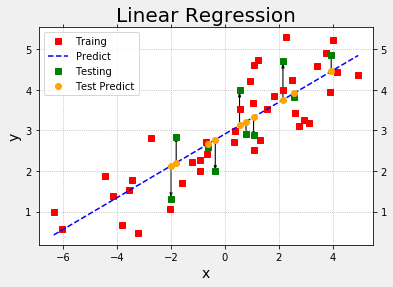

In [81]:
# mylinear.py
import pickle
import numpy as np
import sklearn.linear_model as sl
import sklearn.metrics as sm
import matplotlib.pyplot as mp
import matplotlib.patches as mc
import pandas as pd


def read_data(path):
    x, y = [], []
    data = np.loadtxt(path, delimiter=',')
    for raw in data:
        x.append(raw[0])
        y.append(raw[1])
    return np.array(x), np.array(y)

def train_model(train_x, train_y):
    model = sl.LinearRegression()
    model.fit(train_x, train_y)
    return model
    

def pred(model, x):
    return model.predict(x)
    
    
def eval_model(y, pred_y):
    mae = sm.mean_absolute_error(y, pred_y)
    mse = sm.mean_squared_error(y, pred_y)
    mda = sm.median_absolute_error(y, pred_y)
    evs = sm.explained_variance_score(y, pred_y)
    r2s = sm.r2_score(y, pred_y)
    print(round(mae, 2),
         round(mse, 2),
         round(mda, 2),
         round(evs, 2),
         round(r2s, 2))


def save_model(model, filename):
    with open(filename, 'wb') as f:
        pickle.dump(model, f)
    

def init_chart():
    mp.gcf().set_facecolor(np.ones(3)*240/255)
    mp.title('Linear Regression', fontsize=20)
    mp.xlabel('x', fontsize=14)
    mp.ylabel('y', fontsize=14)
    mp.tick_params(which='both', top=True, right=True, labelright=True, labelsize=10)
    mp.grid(linestyle=':')
    
    
def draw_train(x, y, pred_y):
    mp.plot(x, y, 's', label='Traing', color='red')
    sorted_indices = x.T[0].argsort()
    mp.plot(x.T[0][sorted_indices], pred_y[sorted_indices], '--',color='blue', label='Predict')
    mp.legend()

    
def draw_test(x, y, pred_y):
    mp.plot(x, y, 's', color='green', label='Testing')
    mp.plot(x, pred_y, 'o', color='orange', label='Test Predict')
    
    for x_i, pred_y_i, y_i in zip(x, pred_y, y):
        mp.gca().add_patch(mc.Arrow(x_i, pred_y_i, 0, y_i-pred_y_i, 
                                    width=0.2, ec='none', fc='black'))
    mp.legend()
    
    
def show_chart():
    mp.show()
    
    
def main():
    x, y = read_data('./data/single.txt')
    train_size = int(len(x) * 0.8)
    train_x = x[:train_size].reshape(-1, 1)
    train_y = y[:train_size]
    
    model = train_model(train_x, train_y)
    pred_y = pred(model, train_x)
    eval_model(train_y, pred_y)
    
    test_x = x[train_size:].reshape(-1, 1)
    test_y = y[train_size:]
    pred_test_y = pred(model, test_x)
    eval_model(test_y, pred_test_y)
    
#     save_model(model, './mymodel/my_single_model.mod')
    
    init_chart()
    draw_train(train_x, train_y, pred_y)
    draw_test(test_x, test_y, pred_test_y)
    show_chart()
    
if __name__ == '__main__':
    main()

> use my_single_model.mod，直接使用我们之前保存的训练好的model
- load_mySingleModel.py

# 5 岭回归
---
线性回归的主要问题是对异常值过于敏感。在真实世界的数据收集的过程中，经常会遇到错误的度量结果，而线性回归使用普通的最小二乘法，其目标是使每个样本的误差平方最小。这时， 由于异常值误差的绝对值通常较大，会引起回归模型的质量下降，为了避免这个问题，可以引入包含正则化系数`α`的岭回归模型，通过阈值和权重来有选择的削弱异常样本对回归效果的影响。

- 附件
    - `ridge.py`

# 6 多项式回归(polynomial regression)
---
$$y = k_1x_1 + k_2x_2^2 + k_3x_3^3 + \dots + b$$


sp.PolynomialFeatures 管理多个线性回归器的容器
si.make_pipeline

# 7 决策树回归和自适应增强决策树回归
---
1. 决策树模型和自适应增强决策树模型的比较
    - `housing.py`
2. 特征的相对重要性
    - 在一个特定的回归模型中，影响最终输出的诸特性所作出的贡献并不相同，评估其贡献大小有助于排除影响较小的因素，简化后续数据的处理过程。
    - `myimp.py`
3. 数据的时间周期对特征重要性的影响。
    - `bike.py`

# 8 简单分类器
---
分类规则已知，直接通过代码对数据做分类。

- `mySimple.py`

# 9 逻辑回归分类器
---

```python
import sklearn.linear_model as sl

model = sl.LogisticRegression()
```
- `myLogistic.py`

# 10 朴素贝叶斯分类器
---
```python
import sklearn.naive_bayes as nb

model = no.GaussianNB()
```
- `myNaiveBayes.py`

# 11 划分训练集和测试集
---

```python
import sklearn.model_selection as ms
    
train_x, test_x, train_y, test_y = \
    ms.train_test_split(x, y, test_size=0.2, random_state=10)
```
- `myTrainTest.py`

# 12 用交叉验证检验模型的准确性
---
```python
import sklearn.model_selection as ms

pc = ms.cross_val_score(model, x, y, cv=10, scoring='precision_weighted')
rc = ms.cross_val_score(model, x, y, cv=10, scoring='recall_weighted')
f1 = ms.cross_val_score(model, x, y, cv=10, scoring='f1_weighted')
ac = ms.cross_val_score(model, x, y, cv=10, scoring='accuracy')
print(round(pc.mean(), 2), round(rc.mean(), 2),
      round(f1.mean(), 2), round(ac.mean(), 2))
```

- `myCrossValidation.py`

# 13 混淆矩阵
---
```python
import sklearn.metrics as sm
sm.confusion_matrix()
```
- `myConfusionMatrix.py`

# 14 性能报告
---
```python
import sklearn.metrics as sm
sm.classification_report()
```
- `myReport.py`

# 15 汽车质量评估
---
```python
import sklearn.preprocessing as sp # 数据预处理
import sklearn.ensemble as se # 
import sklearn.model_selection as sm

encoder = sp.LabelEncoder() # 把所有数据转成数字编码格式
model = se.RandomForestClassifier() # 
```
车的属性有：
1. 价格(buying)
    - 昂贵(vhigh)
    - 贵(high)
    - 便宜(med)
    - 廉价(low)
2. 门数
    - 2，3，4，5
3. 人数
    - 2，4....

- data:'/data/car.txt'
- `myCarReport.py`

# 16 验证曲线
---
用于模型参数的选择
```python
import sklearn.model_selection as sm
sm.validation_curve() # 用于超参数的选择
```
- `myVerifyCurve.py`

# 17 学习曲线
---
选择训练集的大小
```python
import sklearn.model_selection as sm

sm.learning_curve() # 用于确定训练集的大小
```
- `myLearnCurve.py`

# 18 完整的分类学习过程
---
- 数据收集 `read_data`
- 训练测试划分 `sm.train_test_split()`
- 模型训练 `predict_model(train_x)`
- 交叉验证 `sm.cross_val_score()`
- 模型测试 `predict_model(test_x)`
- 评估精度 `eval_ac`
- 模型应用 

```python
import sklearn.naive_bayes as nb
import sklearn.model_selection as sm

model = nb.GaussianNB()

# 训练集，测试集划分
train_x, test_x, train_y, test_y = sm.train_test_split(x, y, test_size, random_state)
```
- `myDefineEncoder.py`

# 19 SVM(支持向量机)线性分类器
---
```python
import sklearn.svm as svm

svm.SVC(kernel='linear')
```
- `mySVMLinear.py`

# 20 SVM多项式非线性分类器
---
```python
import sklearn.svm as svm

svm.SVC(kernel='poly', degree=3)
```
- `mySVMPoly.py`

# 21 SVM径向基函数(RBF)非线性分类器
---
```python
import sklearn.svm as svm

svm.SVC(kernel='rbf', C=600, gamma=0.01)
```
- `mySVMRBF.py`

# 22 解决类型数量不平衡问题
---
某一个类型的数据量可能比其他类型多很多，这种条件下训练的分类器可
能会存在较大的偏差，边界线不能反映出数据的真实特性，因此需要考虑修正样本的比例，
或者想办法调和。
```python
import sklearn.svm as svm

svm.SVC(kernel='linear', class_weight='balanced')
```
- `mySCMImbalance.py`

# 23 置信度
---
```python
import sklearn.svm as svm

model = svm.SVC(kernel='rbf', C=600, gamma=0.01, probability=True) # probability=True

cp = model.predict_proba(x) # 预测点各分类比率
```
- `mySVMConfidence.py`

# 24 最优超参数
---
在16 验证曲线的测试中，我们是通过设置超参数区间，得到结果分布，然后人为选择参数值。

如何自动获取最优超参数值？
```python
import sklearn.model_selection as ms
import sklearn.svm as svm

def train_model(x, y):
    params = [
        {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
        {'kernel': ['poly'], 'C': [1], 'degree': [2, 3]},
        {'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001]}]
    
    model = ms.GridSearchCV(svm.SVC(probability=True), params, cv=5)
    model.fit(x, y)
    for i, param in enumerate(model.cv_results_['params']):
        print(param, model.cv_results_['mean_test_score'][i])
    print('best param:', model.best_params_)
    return model # 返回的是测试最优参数
```
- `mySVMHyper.py`

# 25 事件预测
---
先对时间进行分类，然后根据给定测试样本预测所属类别

- `myEventPredict.py`

# 26 估算交通流量
---
- `myTrafficPredict.py`

# 27 k-means聚类
---
针对数据样本间距离的分类方法

`myKmean.py`

# 28 利用聚类实现矢量量化
---
`myKmeanVector.py` 通过图片压缩

# 29 均值漂移聚类
---
利用不同的概率密度匹配数据样本的分布模式，自动计算出类的个数。

`myKmeanShift.py`通过带宽去划分聚类，通过大密度点(概率密度曲线确定)向稀疏扩散。

# 30 凝聚层次聚类
---
和均值漂移方法相反，先确定稀疏点的范围，再向大密度点收缩

- `myAggloCluster.py`

对比有无连结性

- `mySpiral.py`

# 31 评价聚类算法的效果，择优而用
---
度量聚类效果的重要指标(人为指定集群范围，计算每个可选值的模型得分)
- 轮廓系数：轮廓系数用于表示集群是不是被划分的合理，每个集群是否足够密集。
- `myPerf.py`

# 32 用DBSCAN算法自动估算最优的集群数量
---
Density Based Spatial Clustering of Applications with Noise

带噪声的基于密度的聚类方法
- 核心样本：类属确定
- 边缘样本：类属不明确
- 带外样本：不属于任何集群
- `myDbscan.py`

# 33 客户购买习惯的划分
---
- `mySales.py`

# 34 语音识别(ing)
---
```python
import numpy.fft as nf # 用于处理傅里叶的频率转换
import scipy.io.wavfile as wf # 读取wav

freqs = nf.fftfreq(len(sigs), d=1/sample_rate) # 依据采样点长度和采样频率，生成等差频率数组 
ffts = nf.fft(sigs) # 把采样点强度转成对应freqs的强度分布数组

sample_rate, sigs = wf.read(filename) # 返回采样频率和采样点强度

sigs = nf.ifft(ffts)
```
1. 读取和绘制**时间域**音频数据
    - 波形文件：.wav， 时间和强度
    - `mySignal.py`
2. 基于傅里叶变换的**频率域**音频数据（ing）
    - 声音的特征是由频率（强度）表现的
    - 声音有基音和泛音，基音指频率，之所以听着相同基音的声音不同是因为泛音的存在。
    - 傅里叶变换可以把**时间（波音）**转成**频率**
    - 时间域转成频率域
    - `myFreq.py`
3. 基于傅里叶变换的**频率域滤波**
    - `myFilter.py
4. 音频合成
5. 音频特征值
    - `myFeature.py`

# 35 推荐引擎(ing)d6
---
- 机器学习流水线
- 寻找最近邻
- 基于knn算法的分类
- 基于knn算法的回归
- 计算欧氏距离分数
- 皮氏分数
- 寻找相似用户
- 电影推荐

# 36 图像识别
---


## 36.1 opencv-python basic
- `myOpencvBasic.py`

```python
import cv2 as cv
import numpy as np

image = cv.imread('./data/forest.jpg')
# 显示读取的图片
print(image.shape)
# print(image)
cv.imshow('Origimal', image)

# 对图片进行裁剪
h, w = image.shape[: 2]
l, t = int(w/4), int(h/4)
r, b = int(w*3/4), int(h*3/4)
cropped = image[t:b, l:r]
cv.imshow('cropped', cropped)

# 对三个颜色的通道进行拆分
blue = np.zeros_like(cropped)
blue[..., 0] = cropped[..., 0]
cv.imshow('blue', blue)

green = np.zeros_like(cropped)
green[..., 1] = cropped[..., 1]
cv.imshow('green', green)

red = np.zeros_like(cropped)
red[..., 2] = cropped[..., 2]
cv.imshow('red', red)

# 图片缩放
scaled = cv.resize(cropped, (w, h), interpolation=cv.INTER_LINEAR)
cv.imshow('scaled', scaled)

deformed = cv.resize(cropped, None, fx=2, fy=0.5, interpolation=cv.INTER_LINEAR)
cv.imshow('deformed', deformed)

# exit 按键盘任意键退出
cv.waitKey()
```

## 36.2 边缘检测
- `myOpencvEdge.py`


1. `cv.Sobel(src, ddepth, dx, dy, ksize)`
2. `cv.Laplacian(src, ddepth)`
3. `cv.Canny(image, threshold1, threshold2)`

## 36.3 均衡化

- `myOpencvEqualize.py`


1. `cv.cvtColor(src, code)` # 转成其他颜色格式
2. `cv.equalizeHist(src)` # 进行均衡化处理

## 36.4 棱角检测
- `myOpencvCorner.py`


1. `cv.cornerHarris(src, blocksize, ksize, k)`

## 36.5 star特征检测器
- `myOpencvStar.py`

```python
dectector = cv.xfeatures2d.StarDetector_create()
keypoints = dectector.detect(gray)
cv.drawKeypoints(image, keypoints, image, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
```

## 36.6 SIFT特征检测器
- `myOpencvSIFT.py`

```python
dectector = cv.xfeatures2d.SIFT_create()
keypoints = dectector.detect(gray)
cv.drawKeypoints(image, keypoints, image, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
```

## 36.7 图像特征值
- `myOpencvFeature.py`

```python
star = cv.xfeatures2d.StarDetector_create()
keypoints = star.detect(image)
# 用SIFT提取边缘等特征
sift = cv.xfeatures2d.SIFT_create()
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# 对两个特征值进行整合
keypoints, desc = sift.compute(gray, keypoints)
```

## 36.8 图像识别
先对图像的特征进行提取，然后使用隐马尔科夫模型对数据进行训练。
- `myOpencvRecog.py`

# 37 人脸识别
> ### 1 视频捕捉

```python
cap = cv.VideoCapture(0)
while True:
    image = cap.read()[1]
    image = cv.resize(image, None, fx=0.75, fy=0.75, interpolation=cv.INTER_AREA)
    cv.imshow('video', image)
    if cv.waitKey(33) == 27:
        break
cap.release()
cv.destroyAllWindows()
```
- `myOpencvFace.py`

> ### 2 面部定位

```python
face_detector = cv.CascadeClassifier('./data/haar/face.xml')
eye_detector = cv.CascadeClassifier('./data/haar/eye.xml')
nose_detector = cv.CascadeClassifier('./data/haar/nose.xml')
cap = cv.VideoCapture(0)
while True:
    image = cap.read()[1]
    image = cv.resize(image, None, fx=0.75, fy=0.75, interpolation=cv.INTER_AREA)
    faces = face_detector.detectMultiScale(image, 1.3, 5)
    eye = eye_detector.detectMultiScale(image, 1.3, 5)
    nose = nose_detector.detectMultiScale(image, 1.3, 5)
    for l, t, w, h in faces:
        a, b = int(w / 2), int(h / 2)
        cv.ellipse(image, (l + a, t + b), (a, b), 0, 0, 360, (255, 0, 255), 2)
    for l, t, w, h in eye:
        a, b = int(w / 2), int(h / 2)
        cv.ellipse(image, (l + a, t + b), (a, b), 0, 0, 360, (255, 255, 0), 2)
    for l, t, w, h in nose:
        a, b = int(w / 2), int(h / 2)
        cv.ellipse(image, (l + a, t + b), (a, b), 0, 0, 360, (0, 255, 255), 2)

    cv.imshow('video', image)
    if cv.waitKey(33) == 27:
        break
cap.release()
cv.destroyAllWindows()
```
- `myOpencvFace.py`
    
> ### 3 主成分分析(Principal Components Analysis, PCA):降维

```python
import sklearn.decomposition as dc
model = dc.PCA()
x = model.fit_transform(x)
```
- PCA识别数据中的重要部分，并将其按照重要程度排序。当需要处理很大维度的特征值时，利用PCA降维，可以在不损失数据重要特征的同时，降低其处理的复杂度。
- **主要用于线性分析**
- `myOpencvPCA.py`

> ### 4 核主成分分析(KPCA)

```python
import sklearn.decomposition as dc
model = dc.KernelPCA(Kernel='rbf', fit_inverse_transform=True, gamma=10)
x = model.fit_transform(x)
```
- **主要用于非线性分析，数据分割，逆向转换**
- `myOpencvKPCA.py`

> ### 5 独立成分分析(ICA)

```python
import sklearn.decomposition as dc
model = dc.FastICA()
```
- `myOpencvICA.py`

> ### 6 人脸识别

- `myOpencvFaceRecog.py`

```python
# 要用cv的contrib版本
model = cv.face.LBPHFaceRecognizer_create()
```

# 38 自然语言
---


In [1]:
import cv2 as cv

In [3]:
cv.face.LBPHFaceRecognizer_create

In [4]:
face_detector = cv.CascadeClassifier('./data/haar/face.xml')

In [5]:
face_detector.detectMultiScale?

In [ ]:
cv.cvtColor

In [5]:
import sklearn.model_selection as ms
ms.train_test_split?